In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import seaborn as sns
from process_data_for_knn import process_dataset_for_knn
from utils import  is_array_col

In [2]:
sns.set_style('darkgrid')

In [8]:
dataset_path_processed = Path(r'../processed_data/data_processed_10000_1000000.0.csv')
dataset_path_raw = Path(r'../processed_data/data__10000_1000000.0.csv')
df_raw = pd.read_csv(dataset_path_raw)
df_processed = pd.read_csv(dataset_path_processed)
df_knn, exclude, scaler, array_columns, array_lengths  =  process_dataset_for_knn(dataset_path_processed,divide_distributions=True,n_vertices_target=10000)


In [9]:

def make_hists(feature_name,df_raw,df_processed):
#Take out large outliers for better visualization
    df_raw = df_raw[(df_raw[feature_name]<=df_raw[feature_name].quantile(0.99))]
    df_raw = df_raw[(df_raw[feature_name]>=df_raw[feature_name].quantile(0.009))]
    df_processed = df_processed[(df_processed[feature_name]<=df_processed[feature_name].quantile(0.99))]
    df_processed = df_processed[(df_processed[feature_name]>=df_processed[feature_name].quantile(0.009))]
    print(f"Min max before:{df_raw[feature_name].min()},{df_raw[feature_name].max()}")
    print(f"Min max after:{df_processed[feature_name].min()},{df_processed[feature_name].max()}")
    

    for df,title in zip([df_raw,df_processed],['For non preprocessed shapes','For preprocessed shapes']):
        plt.hist(df[feature_name])
        plt.xlabel(feature_name)
        plt.ylabel('Shape count')
        plt.title(title)
        #plt.savefig(r'C:\Users\samme\Google_Drive\Code_library\MIR_Pipeline_Project\graphs/hist_before.png',dpi=600)
        plt.show()

Min max before:46.0,88945.0
Min max after:4360.0,22598.0


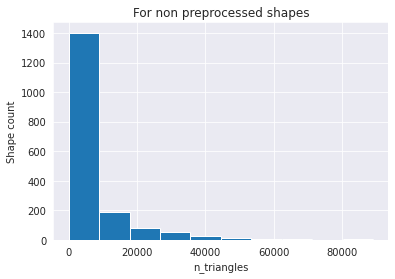

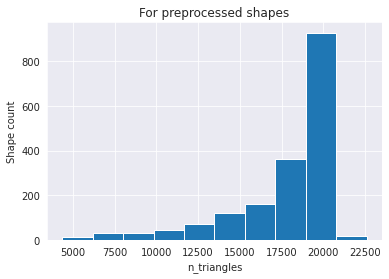

In [10]:
make_hists('n_triangles',df_raw,df_processed)

Min max before:0.01,0.4063259862569904
Min max after:0.01,0.3797523844471205


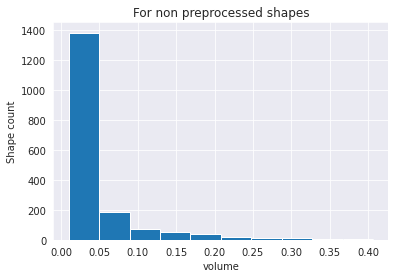

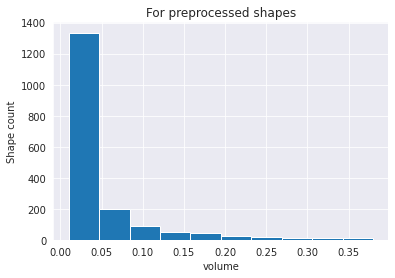

In [11]:
make_hists('volume',df_raw,df_processed)

Min max before:0.10495403273577347,8.689590884939593
Min max after:0.08823136319839764,8.31192002699257


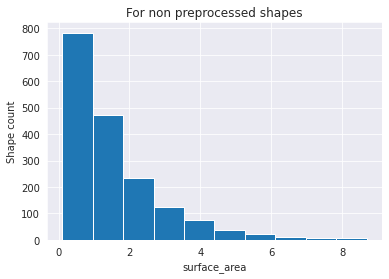

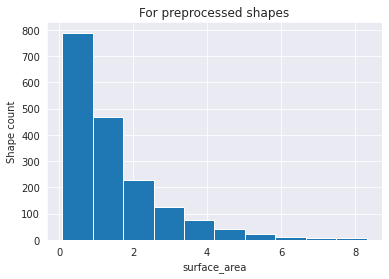

In [12]:
make_hists('surface_area',df_raw,df_processed)

Min max before:1.0099592086166156,16.65893873073351
Min max after:1.7429433572340138,28.35887705958426


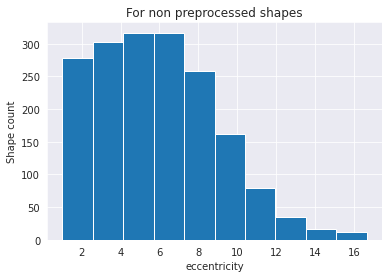

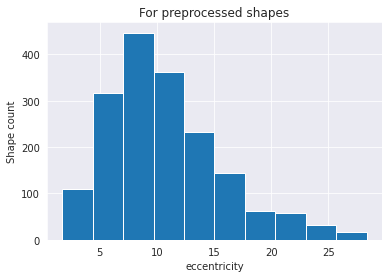

In [13]:
make_hists('eccentricity',df_raw,df_processed)

Min max before:1.0606063604354858,29.99997329711914
Min max after:1.0688395500183103,29.89082908630371


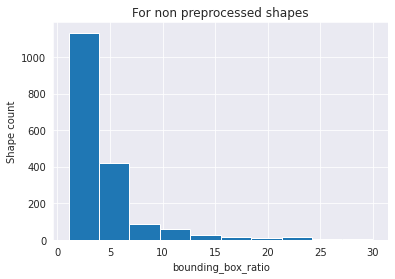

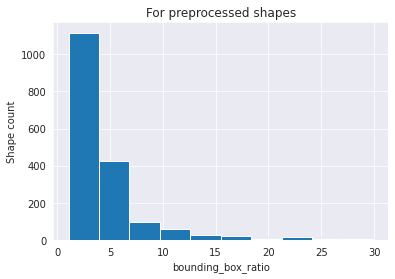

In [14]:
make_hists('bounding_box_ratio',df_raw,df_processed)

In [15]:
def plot_distributions(array_name,df_knn,array_columns,n_classes=5):
    relevant_cols = [x for x in df_knn.columns if is_array_col(array_columns,x)==array_name ]

    for class_name, n_occurences in list(df_knn['classification'].value_counts().items())[0:n_classes]:
        df = df_knn[df_knn['classification']==class_name]
        for index, row in df.iterrows():
            y= row[relevant_cols].values
            x= range(0,len(y))
            plt.plot(x,y)
        plt.xlabel('Bins')
        plt.ylabel('Value')
        plt.title(class_name)
        plt.show()
        

        
        


In [16]:
print(array_columns)

['bounding_box', 'angle_three_vertices', 'barycenter_vertice', 'two_vertices', 'square_area_triangle', 'cube_volume_tetrahedron']


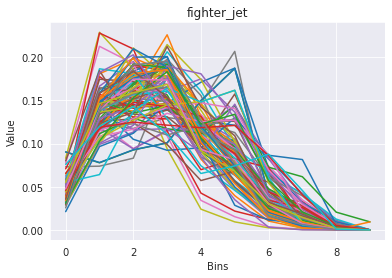

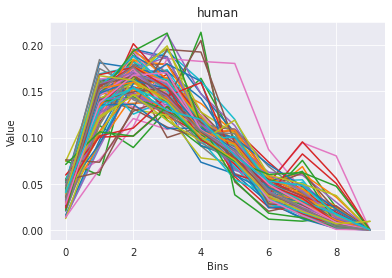

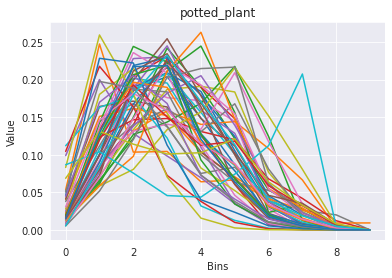

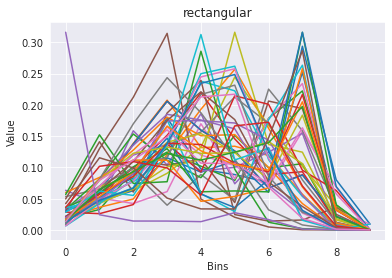

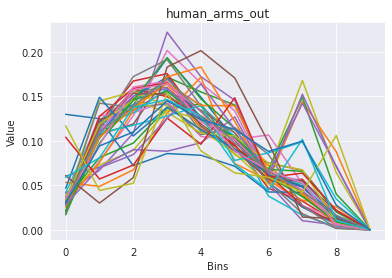

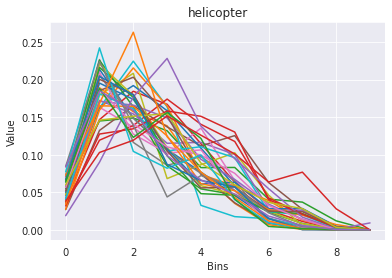

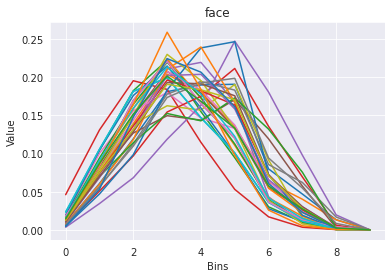

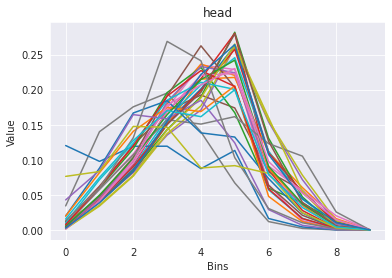

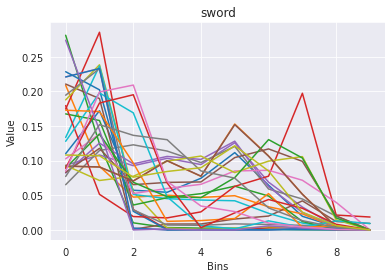

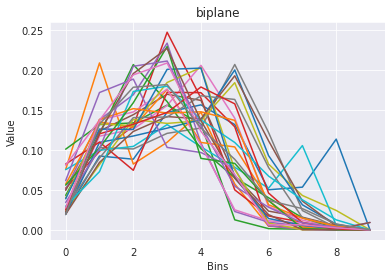

In [18]:
plot_distributions('two_vertices',df_knn,array_columns,n_classes=10)